In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray
from skimage.util import random_noise

In [4]:
#crie uma matriz 5x5  com valores aleatórios no intervalo [1,100]
matriz = np.random.randint(1,100, size=(5,5))
print(matriz)
matriz.shape

[[30 95 27  4 52]
 [16 47 28 51  7]
 [60 92 79 96 35]
 [89 59 52 34  5]
 [33 91 63 10 75]]


(5, 5)

In [5]:
pad_size = 1
img = np.pad(matriz, (1,1), mode='constant')
img

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0, 30, 95, 27,  4, 52,  0],
       [ 0, 16, 47, 28, 51,  7,  0],
       [ 0, 60, 92, 79, 96, 35,  0],
       [ 0, 89, 59, 52, 34,  5,  0],
       [ 0, 33, 91, 63, 10, 75,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [6]:
a = [[1, 2], [3, 4]]
b = np.pad(a, (2,2), mode='constant', constant_values=(0))
print(b)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 2 0 0]
 [0 0 3 4 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [7]:
#crie uma matriz 4x4 com valores no intervalo [1,16]
matriz2 = np.arange(1,17).reshape(4,4)
print(matriz2)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [8]:
rl = np.pad(matriz2, ((pad_size,pad_size),(pad_size,pad_size)), mode='reflect')
rl

array([[ 6,  5,  6,  7,  8,  7],
       [ 2,  1,  2,  3,  4,  3],
       [ 6,  5,  6,  7,  8,  7],
       [10,  9, 10, 11, 12, 11],
       [14, 13, 14, 15, 16, 15],
       [10,  9, 10, 11, 12, 11]])

In [10]:
matriz

array([[30, 95, 27,  4, 52],
       [16, 47, 28, 51,  7],
       [60, 92, 79, 96, 35],
       [89, 59, 52, 34,  5],
       [33, 91, 63, 10, 75]])

In [14]:
matriz[0:3,1:4]

array([[95, 27,  4],
       [47, 28, 51],
       [92, 79, 96]])

# Questão 01

In [19]:
def borda_ignore(img, filtro):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]-2):
        for j in range(img.shape[1]-2):
            result[i+1,j+1] = (img[i:i+3,j:j+3] * filtro).sum(axis=(0,1))    
    return result

In [20]:
def borda_zero(img, filtro):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]-2):
        for j in range(img.shape[1]-2):
            result[i+1,j+1] = int((img[i:i+3,j:j+3] * filtro).sum(axis=(0,1)))
    
    return result

In [21]:
def borda_replicar(img, filtro):
    pass

In [22]:
def borda_espelho(img, filtro):
    pass

In [23]:
def aplica_filtro_rgb(img, filtro, borda):
    result = np.zeros(img.shape)

    if borda == 'ignore':
        for i in range(img.shape[2]):
            result[:,:,i] = borda_ignore(img[:,:,i], filtro)

    elif borda == 'zero':
        for i in range(img.shape[2]):
            result[:,:,i] = borda_zero(img[:,:,i], filtro)

    elif borda == 'replicar':
        for i in range(img.shape[2]):
            result[:,:,i] = borda_replicar(img[:,:,i], filtro)

    elif borda == 'espelho':
        for i in range(img.shape[2]):
            result[:,:,i] = borda_espelho(img[:,:,i], filtro)

    return result

In [24]:
def aplica_filtro(img, filtro, borda):
    if borda == 'ignore':
        result = borda_ignore(img, filtro)
    
    elif borda == 'zero':
        result = borda_zero(img, filtro)

    elif borda == 'replicar':
        result = borda_replicar(img, filtro)
    
    elif borda == 'espelho':
        result = borda_espelho(img, filtro)
    
    return result

In [25]:
def convolucao(imagem, filtro, borda='ignore'):
    if len(imagem.shape)==3:
        newImg = aplica_filtro_rgb(imagem, filtro, borda)
    
    else:
        newImg = aplica_filtro(imagem, filtro, borda)
    

    return newImg

In [26]:
#Filtros
filtro_media = np.ones((3,3))/9

In [15]:
img = imread('sailor_moon.jpg')
img = np.interp(img, (img.min(), img.max()), (0, 1))
img_gray = rgb2gray(img)
img_ruido = random_noise(img, mode='s&p')
img.shape, img_gray.shape, img_ruido.shape

((282, 282, 3), (282, 282), (282, 282, 3))

Text(0.5, 1.0, 'Ruido')

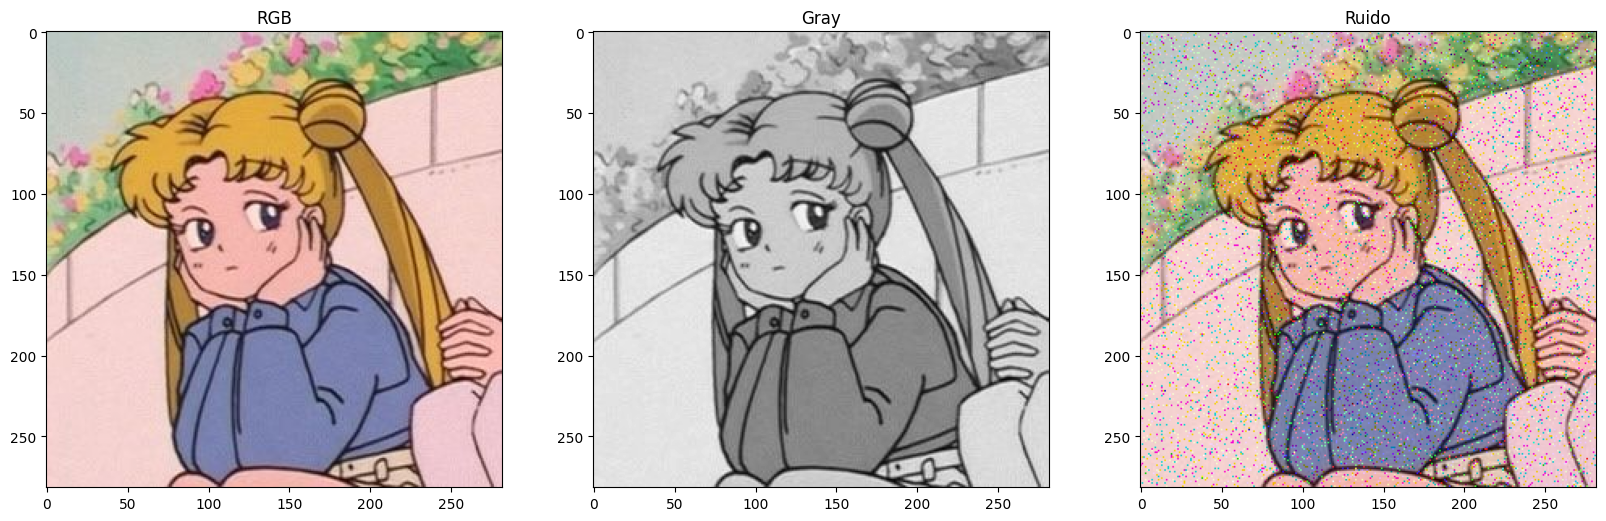

In [16]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
plt.title('RGB')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_gray, cmap='gray')
plt.title('Gray')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img_ruido)
plt.title('Ruido')

Text(0.5, 1.0, 'Ruido')

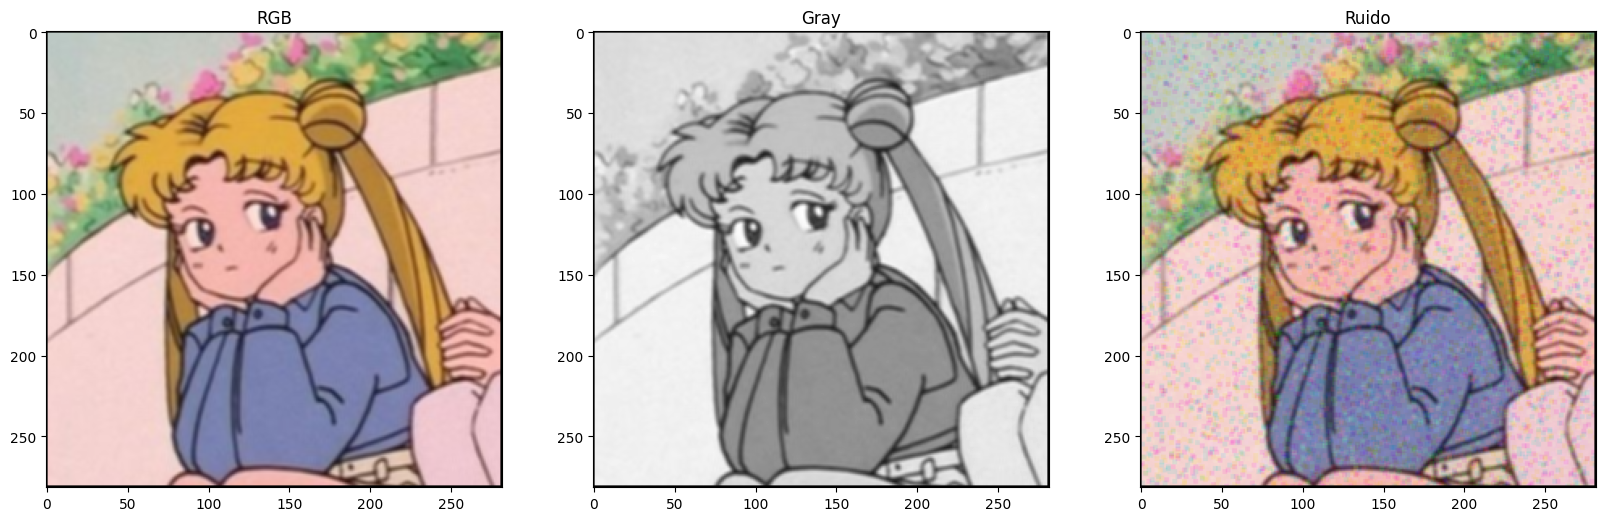

In [28]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(convolucao(img, filtro_media))
plt.title('RGB')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(convolucao(img_gray, filtro_media), cmap='gray')
plt.title('Gray')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(convolucao(img_ruido, filtro_media))
plt.title('Ruido')